`RANDOM FOREST`

In [143]:
#import pandas and numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor

In [93]:
from matplotlib.pyplot import hist

In [2]:
df = pd.read_csv('fulldataset_updated.csv')

In [3]:
df.head()

,Unnamed: 0,imdbid,title,metascore,script department,production companies,writers,directors,casting directors,cast,...,Biography,Comedy,Crime,Drama,Fantasy,Horror,Mystery,Romance,Sci-Fi,Thriller
0,0,118661,The Avengers,12.0,"Sharon Mansfield, Anna Worley","Warner Bros., Jerry Weintraub Productions","Sydney Newman, Don MacPherson",Jeremiah S. Chechik,Susie Figgis,"Ralph Fiennes, Uma Thurman, Sean Connery, Patr...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,1,215545,Bamboozled,54.0,"Shari L. Carpenter, Carolyn De Sousa","New Line Cinema, 40 Acres & A Mule Filmworks",Spike Lee,Spike Lee,Aisha Coley,"Damon Wayans, Savion Glover, Jada Pinkett Smit...",...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,118715,The Big Lebowski,71.0,T. Kukovinski,"Polygram Filmed Entertainment, Working Title F...","Ethan Coen, Joel Coen","Joel Coen, Ethan Coen",John S. Lyons,"Jeff Bridges, John Goodman, Julianne Moore, St...",...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,112573,Braveheart,68.0,"Sally Jones, Kate Pakenham, Anna Worley","Icon Entertainment International, The Ladd Com...",Randall Wallace,Mel Gibson,Patsy Pollock,"James Robinson, Sean Lawlor, Sandy Nelson, Jam...",...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,88847,The Breakfast Club,66.0,Bob Forrest,"Universal Pictures, A&M Films, Channel Product...",John Hughes,John Hughes,Jackie Burch,"Emilio Estevez, Paul Gleason, Anthony Michael ...",...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
all_columns = list(df.columns)
columns_not_of_interest = ["Unnamed: 0", "imdbid", "title", "script department", "production companies", "writers", "directors", "casting directors", "cast"]
columns_of_interest = [col for col in all_columns if col not in columns_not_of_interest]

data = df[columns_of_interest]
X = data.loc[:, data.columns != 'metascore'].values
y = df["metascore"].values
print(X.shape, y.shape)

(1503, 27) (1503,)


In [164]:
print(columns_of_interest)

['metascore', 'scenes', 'characters', 'percent dialogue', 'locations', 'Positive', 'Anger', 'Disgust', 'Fear', 'Negative', 'Sadness', 'Anticipation', 'Joy', 'Surprise', 'Trust', 'Top 3', 'Action', 'Adventure', 'Biography', 'Comedy', 'Crime', 'Drama', 'Fantasy', 'Horror', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller']


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=10)

In [6]:
regr = RandomForestRegressor(n_estimators=100, criterion='absolute_error', random_state=0)

In [7]:
regr.fit(X_train, y_train)

RandomForestRegressor(criterion='absolute_error', random_state=0)

In [8]:
regr.score(X_test, y_test)

0.13952857981840594

In [9]:
mean_absolute_error(y_test, regr.predict(X_test))

12.504817275747508

`FIND BEST MODEL`

In [10]:
from sklearn.model_selection import GridSearchCV, KFold

In [21]:
grid_regr = RandomForestRegressor(random_state=0)
grid_r2_regr = RandomForestRegressor(random_state=0)
grid_squared_regr = RandomForestRegressor(random_state=0)
param_grid = {
    "n_estimators": [10, 50, 100],
    "criterion": ['absolute_error', 'squared_error'],
    "min_samples_split": [2, 5, 10],
    'max_depth': [5,20,None],
    "max_features": [5, 'sqrt', 'log2', None]
}


``MAE Scoring``

In [22]:
grid_abs_search = GridSearchCV(grid_regr, param_grid, scoring='neg_mean_absolute_error', cv=KFold(n_splits=5, shuffle=True, random_state=1), verbose=3, refit=True, error_score='raise', return_train_score=True)

``R2 Scoring``

In [26]:
grid_r2_search = GridSearchCV(grid_r2_regr, param_grid, scoring='r2', cv=KFold(n_splits=5, shuffle=True, random_state=1), refit=True, error_score='raise')

``MAPE Scoring``

In [30]:
grid_squared_search = GridSearchCV(grid_squared_regr, param_grid, scoring='neg_mean_absolute_percentage_error', cv=KFold(n_splits=5, shuffle=True, random_state=1), refit=True, error_score='raise')

In [25]:
grid_abs_search.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV 1/5] END criterion=absolute_error, max_depth=5, max_features=5, min_samples_split=2, n_estimators=10;, score=(train=-12.043, test=-13.206) total time=   0.1s
[CV 2/5] END criterion=absolute_error, max_depth=5, max_features=5, min_samples_split=2, n_estimators=10;, score=(train=-11.855, test=-13.699) total time=   0.1s
[CV 3/5] END criterion=absolute_error, max_depth=5, max_features=5, min_samples_split=2, n_estimators=10;, score=(train=-11.751, test=-14.148) total time=   0.1s
[CV 4/5] END criterion=absolute_error, max_depth=5, max_features=5, min_samples_split=2, n_estimators=10;, score=(train=-12.227, test=-12.509) total time=   0.1s
[CV 5/5] END criterion=absolute_error, max_depth=5, max_features=5, min_samples_split=2, n_estimators=10;, score=(train=-12.069, test=-13.805) total time=   0.1s
[CV 1/5] END criterion=absolute_error, max_depth=5, max_features=5, min_samples_split=2, n_estimators=50;, score=(train=-11.94

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             error_score='raise',
             estimator=RandomForestRegressor(random_state=0),
             param_grid={'criterion': ['absolute_error', 'squared_error'],
                         'max_depth': [5, 20, None],
                         'max_features': [5, 'sqrt', 'log2', None],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=3)

In [28]:
grid_r2_search.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             error_score='raise',
             estimator=RandomForestRegressor(random_state=0),
             param_grid={'criterion': ['absolute_error', 'squared_error'],
                         'max_depth': [5, 20, None],
                         'max_features': [5, 'sqrt', 'log2', None],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100]},
             scoring='r2')

In [31]:
grid_squared_search.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             error_score='raise',
             estimator=RandomForestRegressor(random_state=0),
             param_grid={'criterion': ['absolute_error', 'squared_error'],
                         'max_depth': [5, 20, None],
                         'max_features': [5, 'sqrt', 'log2', None],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100]},
             scoring='neg_mean_absolute_percentage_error')

In [32]:
print(grid_abs_search.best_params_)
print(grid_r2_search.best_params_)
print(grid_squared_search.best_params_)

{'criterion': 'absolute_error', 'max_depth': 5, 'max_features': None, 'min_samples_split': 2, 'n_estimators': 100}
{'criterion': 'absolute_error', 'max_depth': 20, 'max_features': 'log2', 'min_samples_split': 5, 'n_estimators': 50}
{'criterion': 'absolute_error', 'max_depth': 20, 'max_features': 'log2', 'min_samples_split': 5, 'n_estimators': 50}


In [144]:
print("Scoring MAE model: ")
print("R2: ", grid_abs_search.best_estimator_.score(X_test, y_test))
print("MAE: ", mean_absolute_error(y_test, grid_abs_search.best_estimator_.predict(X_test)))
print("MAPE: ", mean_absolute_percentage_error(y_test, grid_abs_search.best_estimator_.predict(X_test)))

print("Scoring R2 model: ")
print("R2: ", grid_r2_search.best_estimator_.score(X_test, y_test))
print("MAE: ", mean_absolute_error(y_test, grid_r2_search.best_estimator_.predict(X_test)))
print("MAPE: ", mean_absolute_percentage_error(y_test, grid_r2_search.best_estimator_.predict(X_test)))

print("Scoring MAPE model: ")
print("R2: ", grid_squared_search.best_estimator_.score(X_test, y_test))
print("MAE: ", mean_absolute_error(y_test, grid_squared_search.best_estimator_.predict(X_test)))
print("MAPE: ", mean_absolute_percentage_error(y_test, grid_squared_search.best_estimator_.predict(X_test)))


Scoring MAE model: 
R2:  0.15838972404091145
MAE:  12.279235880398671
MAPE:  0.24096674915585506
Scoring R2 model: 
R2:  0.1700093248185044
MAE:  12.318006644518274
MAPE:  0.2386129715499541
Scoring MAPE model: 
R2:  0.1700093248185044
MAE:  12.318006644518274
MAPE:  0.2386129715499541


In [229]:
def annot_max(x,y, ax):
    xmax = x[np.argmax(y)]
    ymax = y.max()
    text= "x={:.3f}, y={:.3f}".format(xmax, ymax)
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.9)
    arrowprops=dict(arrowstyle="<-",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)

    "n_estimators": [10, 50, 100],
    "criterion": ['absolute_error', 'squared_error'],
    "min_samples_split": [2, 5, 10],
    'max_depth': [5,20,None],
    "max_features": [5, 'sqrt', 'log2', None]

    mean_test_score param_n_estimators param_criterion param_max_depth  \
0        -13.473246                 10  absolute_error               5   
66       -14.280038                 10  absolute_error              20   
63       -14.255688                 10  absolute_error              20   
60       -13.702232                 10  absolute_error              20   
57       -13.810939                 10  absolute_error              20   
..              ...                ...             ...             ...   
95       -13.384613                100  absolute_error            None   
92       -13.388754                100  absolute_error            None   
89       -13.485881                100  absolute_error            None   
86       -13.419951                100  absolute_error            None   
83       -13.443097                100  absolute_error            None   

   param_min_samples_split  
0                        2  
66                       5  
63                      

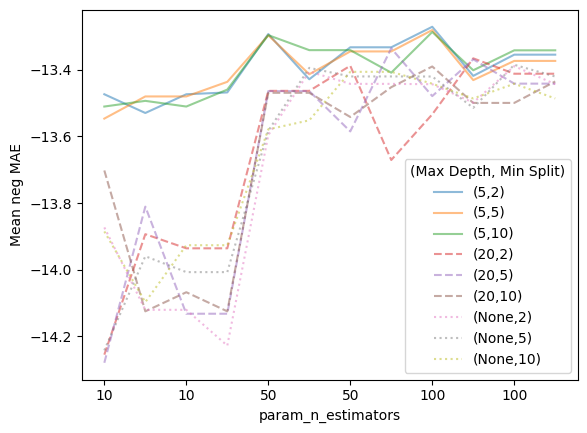

In [280]:
og_res = pd.DataFrame(grid_abs_search.cv_results_)
#print(og_res)
plot_cols = ['mean_test_score', 'param_n_estimators', 'param_criterion', 'param_max_depth', 'param_min_samples_split']
to_plot = og_res[plot_cols].sort_values(by='param_n_estimators')
#want to plot mean_test_score against param_n_estimators and param_criterion
#og_res[plot_cols].plot(x='param_n_estimators', y='mean_test_score')
abs_er_df = to_plot[to_plot['param_criterion']=='absolute_error']

print(abs_er_df )

abs_er_df1 = abs_er_df[abs_er_df['param_max_depth']==5]
abs_1 = abs_er_df1[abs_er_df1['param_min_samples_split']==2]
abs_2 = abs_er_df1[abs_er_df1['param_min_samples_split']==5]
abs_5 = abs_er_df1[abs_er_df1['param_min_samples_split']==10]
sq_er_df1 = abs_er_df[abs_er_df['param_max_depth']==20]
sq_1 = sq_er_df1[sq_er_df1['param_min_samples_split']==2]
sq_2 = sq_er_df1[sq_er_df1['param_min_samples_split']==5]
sq_5 = sq_er_df1[sq_er_df1['param_min_samples_split']==10]
sq_er_df0 = abs_er_df[abs_er_df['param_max_depth']!=5]
sq_er_df2 = sq_er_df0[sq_er_df0['param_max_depth']!=20]
sq_6 = sq_er_df2[sq_er_df2['param_min_samples_split']==2]
sq_7 = sq_er_df2[sq_er_df2['param_min_samples_split']==5]
sq_8 = sq_er_df2[sq_er_df2['param_min_samples_split']==10]
#f_er_df1 = to_plot1[to_plot1['param_min_samples_split']==2]
#f1_er_df1 = to_plot1[to_plot1['param_min_samples_split']==5]

ax1 = abs_1.plot(x='param_n_estimators',y='mean_test_score',alpha=0.5, label='(5,2)', ylabel='Mean neg MAE')
abs_2.plot(x='param_n_estimators',y='mean_test_score', ax=ax1, alpha=0.5, label='(5,5)')
abs_5.plot(x='param_n_estimators',y='mean_test_score',ax=ax1, alpha=0.5, label='(5,10)')
sq_1.plot(x='param_n_estimators',y='mean_test_score',ax=ax1,linestyle='dashed', alpha=0.5, label='(20,2)')
sq_2.plot(x='param_n_estimators',y='mean_test_score',ax=ax1, linestyle='dashed',alpha=0.5, label='(20,5)')
sq_5.plot(x='param_n_estimators',y='mean_test_score',ax=ax1,linestyle='dashed', alpha=0.5, label='(20,10)')
sq_6.plot(x='param_n_estimators',y='mean_test_score',ax=ax1, linestyle='dotted', alpha=0.5, label='(None,2)')
sq_7.plot(x='param_n_estimators',y='mean_test_score',ax=ax1,linestyle='dotted', alpha=0.5, label='(None,5)')
sq_8.plot(x='param_n_estimators',y='mean_test_score',ax=ax1,linestyle='dotted', alpha=0.5, label='(None,10)')

x_a = abs_er_df['param_n_estimators']
y_a = abs_er_df['mean_test_score']

annot_max(x_a, y_a, ax1)
ax1.legend(title="(Max Depth, Min Split)")

annot_max(abs_er_df['param_n_estimators'],abs_er_df['mean_test_score'], ax1)
#annot_max(sq_er_df['param_n_estimators'],sq_er_df['mean_test_score'], ax)

`^^ PLOT FOR MAE MODEL`

     mean_test_score param_n_estimators param_criterion
0           0.100170                 10  absolute_error
1           0.111251                 50  absolute_error
2           0.111650                100  absolute_error
3           0.098979                 10  absolute_error
4           0.113796                 50  absolute_error
..               ...                ...             ...
211         0.072394                 50   squared_error
212         0.084789                100   squared_error
213         0.020149                 10   squared_error
214         0.079408                 50   squared_error
215         0.090989                100   squared_error

[216 rows x 3 columns]


<Axes: title={'center': 'Plot of error score by n_estimators for R2 model'}, xlabel='param_n_estimators', ylabel='Mean r2'>

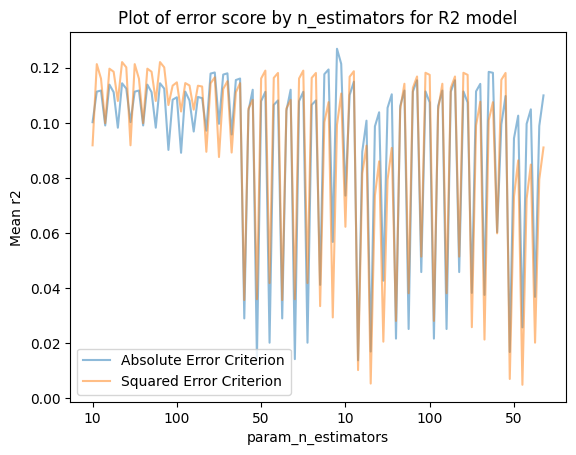

In [149]:
og_res2 = pd.DataFrame(grid_r2_search.cv_results_)
#print(og_res)
plot_cols2 = ['mean_test_score', 'param_n_estimators', 'param_criterion']
to_plot2 = og_res2[plot_cols2]
#want to plot mean_test_score against param_n_estimators and param_criterion
#og_res[plot_cols].plot(x='param_n_estimators', y='mean_test_score')
print(to_plot2)
abs_er_df2 = to_plot2[to_plot2['param_criterion']=='absolute_error']
sq_er_df2 = to_plot2[to_plot2['param_criterion']=='squared_error']

ax2 = abs_er_df2.plot(x='param_n_estimators',y='mean_test_score',alpha=0.5, label='Absolute Error Criterion', ylabel='Mean r2', title='Plot of error score by n_estimators for R2 model')
sq_er_df2.plot(x='param_n_estimators',y='mean_test_score',ax=ax2, alpha=0.5, label='Squared Error Criterion', ylabel='Mean r2')

     mean_test_score param_n_estimators param_criterion
0          -0.288998                 10  absolute_error
1          -0.286948                 50  absolute_error
2          -0.286876                100  absolute_error
3          -0.288888                 10  absolute_error
4          -0.286891                 50  absolute_error
..               ...                ...             ...
211        -0.285279                 50   squared_error
212        -0.282793                100   squared_error
213        -0.289382                 10   squared_error
214        -0.283852                 50   squared_error
215        -0.282015                100   squared_error

[216 rows x 3 columns]


<Axes: title={'center': 'Plot of error score by n_estimators for MAPE model'}, xlabel='param_n_estimators', ylabel='Mean MAPE'>

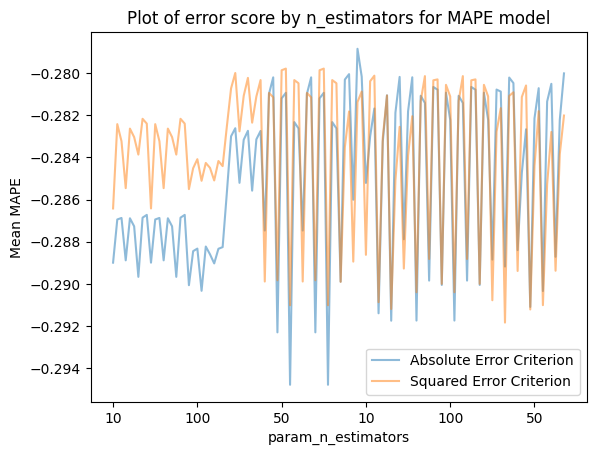

In [150]:
og_res3 = pd.DataFrame(grid_squared_search.cv_results_)
#print(og_res)
plot_cols3 = ['mean_test_score', 'param_n_estimators', 'param_criterion']
to_plot3 = og_res3[plot_cols3]
#want to plot mean_test_score against param_n_estimators and param_criterion
#og_res[plot_cols].plot(x='param_n_estimators', y='mean_test_score')
print(to_plot3)
abs_er_df3 = to_plot3[to_plot3['param_criterion']=='absolute_error']
sq_er_df3 = to_plot3[to_plot3['param_criterion']=='squared_error']

ax3 = abs_er_df3.plot(x='param_n_estimators',y='mean_test_score',alpha=0.5, label='Absolute Error Criterion', ylabel='Mean MAPE', title='Plot of error score by n_estimators for MAPE model')
sq_er_df3.plot(x='param_n_estimators',y='mean_test_score',ax=ax3, alpha=0.5, label='Squared Error Criterion', ylabel='Mean MAPE')

`Now with these, do grid CV on number of estimators:`
Only using the parameters that appeared in the best

Here abs_error was always the best criterion !

In [35]:
grid_best_MAE_regr = RandomForestRegressor(random_state=0)
grid_best_r2_regr = RandomForestRegressor(random_state=0)
param_best_grid = {
    "n_estimators": [50, 100, 200, 500, 1000],
    "criterion": ['absolute_error'],
    "min_samples_split": [2, 5],
    'max_depth': [5,20],
    "max_features": ['log2', None]
}

In [36]:
grid_best_MAE_search = GridSearchCV(grid_best_MAE_regr, param_best_grid, scoring='neg_mean_absolute_error', cv=KFold(n_splits=5, shuffle=True, random_state=1), refit=True, error_score='raise', return_train_score=True)
grid_best_r2_search = GridSearchCV(grid_best_r2_regr, param_best_grid, scoring='r2', cv=KFold(n_splits=5, shuffle=True, random_state=1), refit=True, error_score='raise', return_train_score=True)

In [37]:
grid_best_MAE_search.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             error_score='raise',
             estimator=RandomForestRegressor(random_state=0),
             param_grid={'criterion': ['absolute_error'], 'max_depth': [5, 20],
                         'max_features': ['log2', None],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 200, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [41]:
print(grid_best_MAE_search.cv_results_)

{'mean_fit_time': array([ 0.31009417,  0.62506351,  1.28923421,  3.17172704,  6.2032618 ,
        0.30651217,  0.61392722,  1.25898504,  3.47394586, 10.09041705,
        2.58664174,  5.22113657, 10.42911406, 25.89428458, 51.86112309,
        2.57423244,  5.15884438, 10.4966198 , 26.03895979, 52.0203155 ,
        0.82074761,  1.64545612,  3.29796681,  8.26131682, 17.22474294,
        0.78575172,  1.58152571,  3.15692811,  7.95520506, 16.44016967,
        4.17219701,  8.50384274, 16.70430374, 41.79747238, 83.56644945,
        4.07228093,  8.22004819, 16.39738169, 40.88309989, 81.78671322]), 'std_fit_time': array([0.0058971 , 0.00344038, 0.08378377, 0.08605338, 0.041533  ,
       0.003793  , 0.00719329, 0.05630946, 0.6897336 , 0.0739469 ,
       0.02915629, 0.11898216, 0.21747602, 0.04715559, 0.4024825 ,
       0.0295566 , 0.04555456, 0.2488065 , 0.15457869, 0.39217553,
       0.01412736, 0.01938387, 0.02542152, 0.07959675, 0.90531482,
       0.0098985 , 0.02110021, 0.03796464, 0.13919616

In [49]:
print(grid_best_MAE_search.best_params_)
print(grid_best_MAE_search.best_estimator_.feature_importances_)

{'criterion': 'absolute_error', 'max_depth': 5, 'max_features': None, 'min_samples_split': 2, 'n_estimators': 100}
[0.0480869  0.13077126 0.07433187 0.04989715 0.03913824 0.0272123
 0.04099896 0.02671704 0.0241478  0.02963233 0.02337718 0.04271613
 0.03492789 0.03884983 0.064173   0.05400006 0.00728979 0.0010719
 0.00372988 0.00289253 0.20363252 0.00421132 0.00724543 0.00759635
 0.00389884 0.00168615 0.00776736]


In [52]:
import operator

In [54]:
cols_used = [col for col in data.columns if col!='metascore']
im = grid_best_MAE_search.best_estimator_.feature_importances_
dic_im = {}
for i in range(len(cols_used)):
    dic_im[cols_used[i]]=im[i]
sort_im = dict(sorted(dic_im.items(), key=operator.itemgetter(1), reverse=True))
print(sort_im)


{'Drama': 0.20363252144495508, 'characters': 0.13077126316310575, 'percent dialogue': 0.07433187400379493, 'Top 3': 0.06417300077444882, 'Action': 0.05400005819285401, 'locations': 0.0498971475395059, 'scenes': 0.048086900093957725, 'Joy': 0.04271613263825038, 'Disgust': 0.04099895974528317, 'Positive': 0.03913823897445671, 'Trust': 0.03884983001279993, 'Surprise': 0.034927888818917924, 'Sadness': 0.029632334767686282, 'Anger': 0.027212295403447016, 'Fear': 0.026717041548870998, 'Negative': 0.02414780063869428, 'Anticipation': 0.02337718106246518, 'Thriller': 0.007767357057842837, 'Mystery': 0.007596348390860211, 'Adventure': 0.007289789186845628, 'Horror': 0.00724542671393942, 'Fantasy': 0.004211320409926666, 'Romance': 0.0038988414334496556, 'Comedy': 0.003729876634673244, 'Crime': 0.002892526069289069, 'Sci-Fi': 0.0016861494721974748, 'Biography': 0.0010718958074816785}


`Histogram of residuals on testing data`

In [86]:
y_pred = grid_best_MAE_search.best_estimator_.predict(X_test)
y_tpred = grid_best_MAE_search.best_estimator_.predict(X)

In [79]:
resids = []
for i in range(len(y_pred)):
    y_red = y_test[i]-y[i]
    resids.append(y_red)

Text(0.5, 1.0, 'Histogram of Predicted Metascores and True Metascores on test dataset (MAE)')

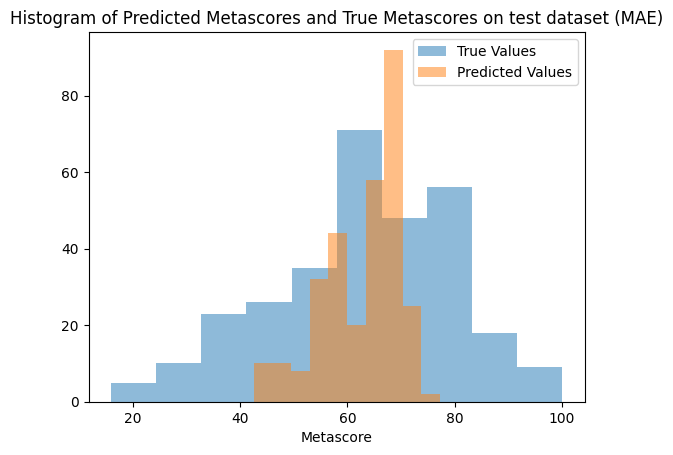

In [154]:
plt.hist(y_test, alpha=0.5, label='True Values')
plt.hist(y_pred, alpha=0.5, label='Predicted Values')
#plt.legend('True Values','Predicted Values' )
plt.legend(prop={'size': 10})
plt.xlabel("Metascore")
plt.title("Histogram of Predicted Metascores and True Metascores on test dataset (MAE)")

Text(0.5, 1.0, 'Histogram of Predicted Metascores and True Metascores on full datset (MAE)')

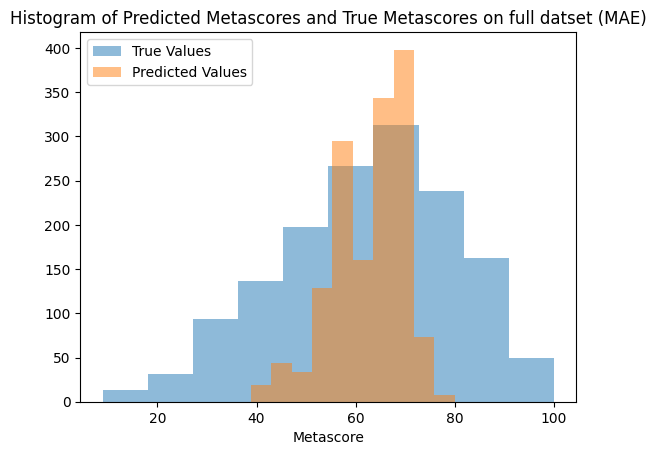

In [155]:
plt.hist(y, alpha=0.5, label='True Values')
plt.hist(y_tpred, alpha=0.5, label='Predicted Values')
#plt.legend('True Values','Predicted Values' )
plt.legend(prop={'size': 10})
plt.xlabel("Metascore")
plt.title("Histogram of Predicted Metascores and True Metascores on full datset (MAE)")

`Training errs for this model`

    mean_test_score param_n_estimators param_max_depth param_min_samples_split
0        -13.428218                 50               5                       2
30       -13.670771                 50              20                       2
25       -13.335177                 50              20                       5
5        -13.413162                 50               5                       5
20       -13.387677                 50              20                       2
15       -13.296173                 50               5                       5
35       -13.584795                 50              20                       5
10       -13.292274                 50               5                       2
26       -13.368279                100              20                       5
21       -13.365310                100              20                       2
31       -13.533598                100              20                       2
16       -13.280305                100              

<Axes: xlabel='param_n_estimators', ylabel='Mean neg MAE'>

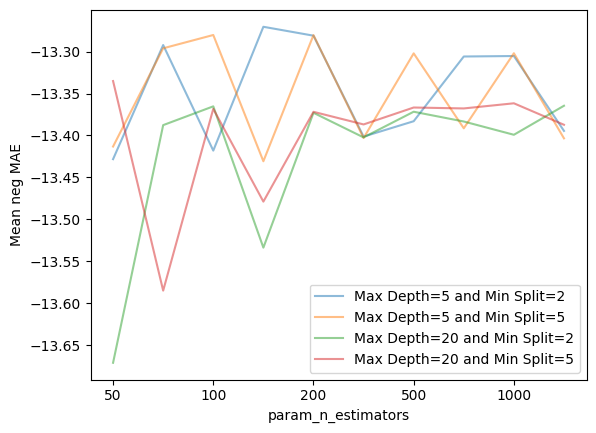

In [236]:
og_res1 = pd.DataFrame(grid_best_MAE_search.cv_results_)#

#print(og_res)
plot_cols1 = ['mean_test_score', 'param_n_estimators', 'param_max_depth', 'param_min_samples_split']
to_plot1 = og_res1[plot_cols1].sort_values(by=['param_n_estimators'])
print(to_plot1)
#want to plot mean_test_score against param_n_estimators and param_criterion
#og_res[plot_cols].plot(x='param_n_estimators', y='mean_test_score')

abs_er_df1 = to_plot1[to_plot1['param_max_depth']==5]
abs_1 = abs_er_df1[abs_er_df1['param_min_samples_split']==2]
abs_2 = abs_er_df1[abs_er_df1['param_min_samples_split']==5]
sq_er_df1 = to_plot1[to_plot1['param_max_depth']==20]
sq_1 = sq_er_df1[sq_er_df1['param_min_samples_split']==2]
sq_2 = sq_er_df1[sq_er_df1['param_min_samples_split']==5]
#f_er_df1 = to_plot1[to_plot1['param_min_samples_split']==2]
#f1_er_df1 = to_plot1[to_plot1['param_min_samples_split']==5]

ax1 = abs_1.plot(x='param_n_estimators',y='mean_test_score',alpha=0.5, label='Max Depth=5 and Min Split=2', ylabel='Mean neg MAE')
abs_2.plot(x='param_n_estimators',y='mean_test_score',ax=ax1, alpha=0.5, label='Max Depth=5 and Min Split=5')
sq_1.plot(x='param_n_estimators',y='mean_test_score',ax=ax1, alpha=0.5, label='Max Depth=20 and Min Split=2')
sq_2.plot(x='param_n_estimators',y='mean_test_score',ax=ax1, alpha=0.5, label='Max Depth=20 and Min Split=5')

`for MAE: {'criterion': 'absolute_error', 'max_depth': 5, 'max_features': None, 'min_samples_split': 2, 'n_estimators': 100}

In [151]:
grid_best_r2_search.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             error_score='raise',
             estimator=RandomForestRegressor(random_state=0),
             param_grid={'criterion': ['absolute_error'], 'max_depth': [5, 20],
                         'max_features': ['log2', None],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 200, 500, 1000]},
             return_train_score=True, scoring='r2')

In [153]:
print(grid_best_r2_search.best_params_)
print(grid_best_r2_search.best_estimator_.feature_importances_)

im2 = grid_best_r2_search.best_estimator_.feature_importances_
dic_im2 = {}
for i in range(len(cols_used)):
    dic_im2[cols_used[i]]=im2[i]
sort_im2 = dict(sorted(dic_im2.items(), key=operator.itemgetter(1), reverse=True))
print(sort_im2)

{'criterion': 'absolute_error', 'max_depth': 20, 'max_features': 'log2', 'min_samples_split': 5, 'n_estimators': 50}
[0.06355452 0.06330594 0.06958806 0.05519177 0.05392507 0.05139297
 0.05446236 0.0565047  0.05164223 0.05566746 0.05289916 0.06195893
 0.05621924 0.05714154 0.05967887 0.018176   0.00809846 0.00474148
 0.00756913 0.00528865 0.03270153 0.00885056 0.01376042 0.00803148
 0.00770669 0.00896227 0.01298049]
{'percent dialogue': 0.06958806469109989, 'scenes': 0.06355452371986729, 'characters': 0.06330593958239619, 'Joy': 0.061958927982140116, 'Top 3': 0.059678867325979865, 'Trust': 0.057141539418371835, 'Fear': 0.056504700287175066, 'Surprise': 0.05621924112930396, 'Sadness': 0.055667460634479395, 'locations': 0.05519177001783555, 'Disgust': 0.054462361966054716, 'Positive': 0.05392507469719767, 'Anticipation': 0.052899161906666346, 'Negative': 0.0516422339689884, 'Anger': 0.05139296867860502, 'Drama': 0.03270153303289172, 'Action': 0.01817600206602651, 'Horror': 0.013760420003

In [156]:
y_pred2 = grid_best_r2_search.best_estimator_.predict(X_test)
y_tpred2 = grid_best_r2_search.best_estimator_.predict(X)

In [281]:
print(grid_best_r2_search.best_params_)

{'criterion': 'absolute_error', 'max_depth': 20, 'max_features': 'log2', 'min_samples_split': 5, 'n_estimators': 50}


Text(0.5, 1.0, 'Histogram of Predicted Metascores and True Metascores on test dataset (r2)')

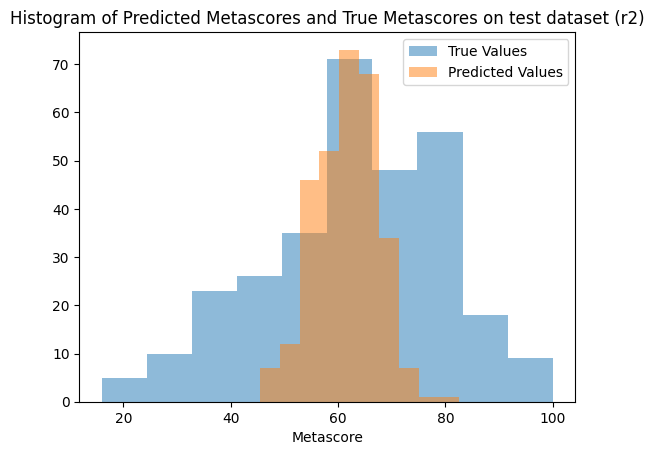

In [157]:
plt.hist(y_test, alpha=0.5, label='True Values')
plt.hist(y_pred2, alpha=0.5, label='Predicted Values')
#plt.legend('True Values','Predicted Values' )
plt.legend(prop={'size': 10})
plt.xlabel("Metascore")
plt.title("Histogram of Predicted Metascores and True Metascores on test dataset (r2)")

Text(0.5, 1.0, 'Histogram of Predicted Metascores and True Metascores on full datset (r2)')

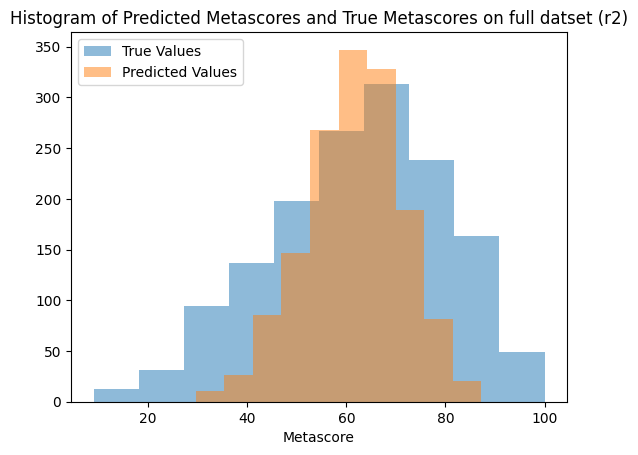

In [158]:
plt.hist(y, alpha=0.5, label='True Values')
plt.hist(y_tpred2, alpha=0.5, label='Predicted Values')
#plt.legend('True Values','Predicted Values' )
plt.legend(prop={'size': 10})
plt.xlabel("Metascore")
plt.title("Histogram of Predicted Metascores and True Metascores on full datset (r2)")

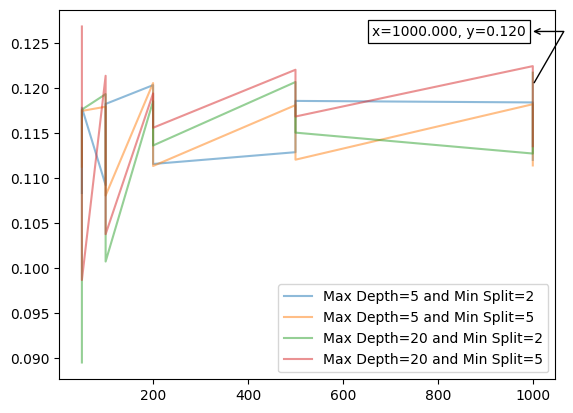

In [256]:
og_res2 = pd.DataFrame(grid_best_r2_search.cv_results_)#

#print(og_res)
plot_cols2 = ['mean_test_score', 'param_n_estimators', 'param_max_depth', 'param_min_samples_split']
to_plot2 = og_res2[plot_cols2].sort_values(by=['param_n_estimators'])
#want to plot mean_test_score against param_n_estimators and param_criterion
#og_res[plot_cols].plot(x='param_n_estimators', y='mean_test_score')

abs_er_df2 = to_plot2[to_plot2['param_max_depth']==5]
abs_3 = abs_er_df2[abs_er_df2['param_min_samples_split']==2]
abs_4 = abs_er_df2[abs_er_df2['param_min_samples_split']==5]
sq_er_df2 = to_plot2[to_plot2['param_max_depth']==20]
sq_3 = sq_er_df2[sq_er_df2['param_min_samples_split']==2]
sq_4 = sq_er_df2[sq_er_df2['param_min_samples_split']==5]
#f_er_df1 = to_plot1[to_plot1['param_min_samples_split']==2]
#f1_er_df1 = to_plot1[to_plot1['param_min_samples_split']==5]
x_a2 = abs_3['param_n_estimators']
y_a2 = abs_3['mean_test_score']

fig = plt.figure()
ax2 = fig.add_subplot(111)
plt.plot(abs_3['param_n_estimators'],abs_3['mean_test_score'], alpha=0.5, label='Max Depth=5 and Min Split=2')
plt.plot(abs_4['param_n_estimators'],abs_4['mean_test_score'], alpha=0.5, label='Max Depth=5 and Min Split=5')
plt.plot(sq_3['param_n_estimators'],sq_3['mean_test_score'], alpha=0.5, label='Max Depth=20 and Min Split=2')
plt.plot(sq_4['param_n_estimators'],sq_4['mean_test_score'], alpha=0.5, label='Max Depth=20 and Min Split=5')
annot_max(x_a2, y_a2, ax2)
plt.legend()
plt.show()



`Consolidate into our best Model`

In [163]:
models_conc = ["MAE", "R2", "MAPE", "best r2", "best MAE"]
r2_conc = [grid_abs_search.best_estimator_.score(X_test, y_test), grid_r2_search.best_estimator_.score(X_test, y_test), grid_squared_search.best_estimator_.score(X_test, y_test), grid_best_r2_search.best_estimator_.score(X_test, y_test), grid_best_MAE_search.best_estimator_.score(X_test, y_test)]
mae_conc = [mean_absolute_error(y_test, grid_abs_search.best_estimator_.predict(X_test)),  mean_absolute_error(y_test, grid_r2_search.best_estimator_.predict(X_test)),mean_absolute_error(y_test, grid_squared_search.best_estimator_.predict(X_test)),  mean_absolute_error(y_test, grid_best_r2_search.best_estimator_.predict(X_test)), mean_absolute_error(y_test, grid_best_MAE_search.best_estimator_.predict(X_test))]
mape_conc = [mean_absolute_percentage_error(y_test, grid_abs_search.best_estimator_.predict(X_test)), mean_absolute_percentage_error(y_test, grid_r2_search.best_estimator_.predict(X_test)), mean_absolute_percentage_error(y_test, grid_squared_search.best_estimator_.predict(X_test)), mean_absolute_percentage_error(y_test, grid_best_r2_search.best_estimator_.predict(X_test)), mean_absolute_percentage_error(y_test, grid_best_MAE_search.best_estimator_.predict(X_test))]

for i in range(len(models_conc)):
    print("Scoring the ", models_conc[i], " model:")
    print("R2: ", r2_conc[i])
    print("MAE", mae_conc[i])
    print("MAPE", mape_conc[i])

Scoring the  MAE  model:
R2:  0.15838972404091145
MAE 12.279235880398671
MAPE 0.24096674915585506
Scoring the  R2  model:
R2:  0.1700093248185044
MAE 12.318006644518274
MAPE 0.2386129715499541
Scoring the  MAPE  model:
R2:  0.1700093248185044
MAE 12.318006644518274
MAPE 0.2386129715499541
Scoring the  best r2  model:
R2:  0.1700093248185044
MAE 12.318006644518274
MAPE 0.2386129715499541
Scoring the  best MAE  model:
R2:  0.15838972404091145
MAE 12.279235880398671
MAPE 0.24096674915585506
['MAE', 'R2', 'MAPE', 'best r2', 'best MAE']
[0.15838972404091145, 0.1700093248185044, 0.1700093248185044, 0.1700093248185044, 0.15838972404091145]
[12.279235880398671, 12.318006644518274, 12.318006644518274, 12.318006644518274, 12.279235880398671]
[0.24096674915585506, 0.2386129715499541, 0.2386129715499541, 0.2386129715499541, 0.24096674915585506]


In [257]:
#Compare - wanted lowest MAE and lowest magnitude r2
print(max(r2_conc))
print(min(mae_conc))
#this is the best MAE model!
print(grid_best_MAE_search.best_params_)


0.1700093248185044
12.279235880398671
{'criterion': 'absolute_error', 'max_depth': 5, 'max_features': None, 'min_samples_split': 2, 'n_estimators': 100}


`WE WANT as METRICS:` 
- MAE
- MAPE
- R2
- histogram of predictions
- graphs of validation and test errors during training
- same metrics for a couple different hyperparemeters

In [237]:
best_regr = RandomForestRegressor(n_estimators=100, criterion='absolute_error', max_depth=5, max_features=None, min_samples_split=5)

In [238]:
best_regr.fit(X_train, y_train)

RandomForestRegressor(criterion='absolute_error', max_depth=5,
                      max_features=None, min_samples_split=5)

In [239]:
y_pred_best = best_regr.predict(X_test)

In [240]:
best_regr.score(X_test, y_test)

0.16131707415522434

In [241]:
mean_absolute_error(y_test, best_regr.predict(X_test))
mean_absolute_percentage_error(y_test, best_regr.predict(X_test))

0.24105009062119315

`On the test set, best model has:`
- MAE = 12.601029900332225
- r2 = 0.11591382877850076
- MAPE = 0.2443280366586418

In [242]:
import forestci as fci

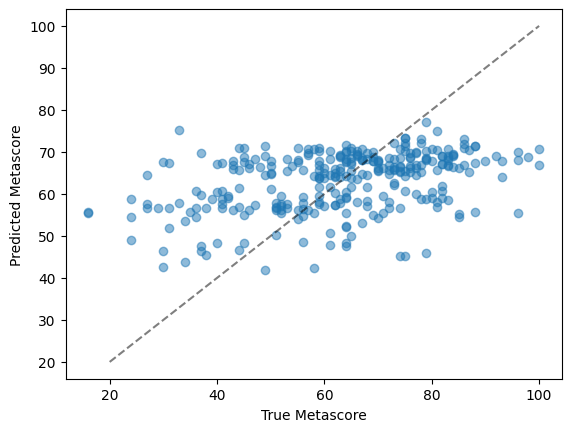

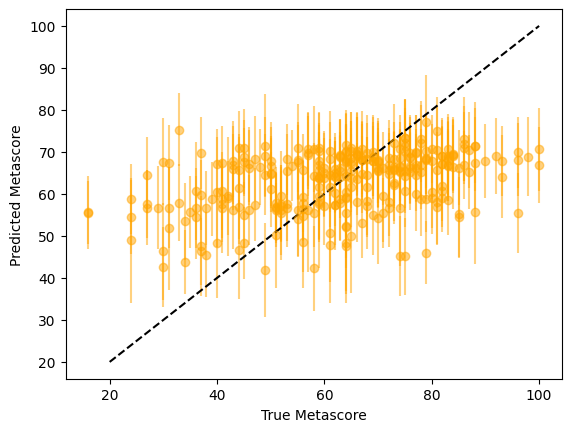

In [243]:
#Source: Forestci documentation https://contrib.scikit-learn.org/forest-confidence-interval/auto_examples/plot_mpg.html 

# Plot predicted MPG without error bars
plt.scatter(y_test, y_pred_best, alpha=0.5)
plt.plot([20, 100], [20, 100], 'k--', alpha=0.5)
plt.xlabel('True Metascore')
plt.ylabel('Predicted Metascore')
plt.show()

# Calculate the variance
var = fci.random_forest_error(best_regr, X_train,
                                            X_test)

# Plot error bars for predicted MPG using unbiased variance
plt.errorbar(y_test, y_pred_best, yerr=np.sqrt(var), fmt='o', alpha=0.5, color='orange')
plt.plot([20, 100], [20, 100], 'k--')
plt.xlabel('True Metascore')
plt.ylabel('Predicted Metascore')
plt.show()